## Data Preparation

In [5]:
# install scikit-learn, tensorflow, pandas, matplotlib, numpy

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# randomseed
np.random.seed(0)

# data : y = ax+b
a = 2
b = 1
noise_scale = 10

# data generation
x = np.linspace(0, 50, 100)
q = np.random.normal(0, noise_scale, x.shape)
y = a * x + b + q

# # data : y = a*exp(bx)
# a = 2
# b = 1
# c= 50
# noise_scale = 20

# # data generation
# x = np.linspace(0, 5, 100)
# y = a * np.exp(b * x) + q + c

# splitting dataset to training set and testing set 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)



##  Data visualization

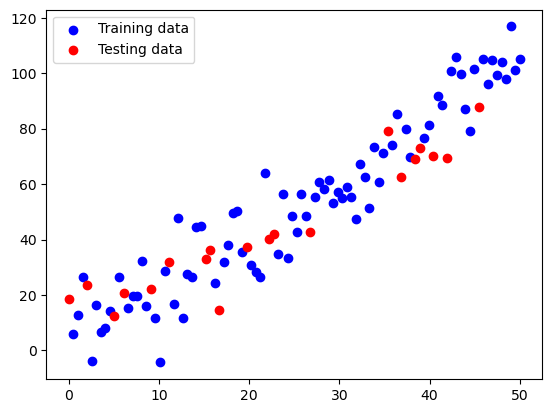

In [2]:
plt.scatter(x_train, y_train, color='blue', label='Training data')
plt.scatter(x_test, y_test, color='red', label='Testing data')
plt.legend()
plt.show()


## Build ANN model

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Dense(1, input_shape=(1,), activation='linear')
])

# model = Sequential([
#     Dense(5, input_shape=(1,), activation='relu'),
#     Dense(3, activation='relu'),
#     Dense(1, activation='linear')
# ])

# Sequential.help
model.compile(optimizer=Adam(learning_rate=0.01), loss='mse')


## Training ANN model

In [4]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(x_train, y_train, validation_split=0.2, epochs=200, batch_size=2)

Epoch 1/200
32/32 [==============================] - 2s 18ms/step - loss: 8906.9648 - val_loss: 9275.2275
Epoch 2/200
32/32 [==============================] - 0s 6ms/step - loss: 7538.3896 - val_loss: 7706.0386
Epoch 3/200
32/32 [==============================] - 0s 9ms/step - loss: 6282.6523 - val_loss: 6398.8828
Epoch 4/200
32/32 [==============================] - 0s 5ms/step - loss: 5188.5659 - val_loss: 5324.3511
Epoch 5/200
32/32 [==============================] - 0s 6ms/step - loss: 4268.0679 - val_loss: 4356.7695
Epoch 6/200
32/32 [==============================] - 0s 6ms/step - loss: 3471.1643 - val_loss: 3537.3801
Epoch 7/200
32/32 [==============================] - 0s 5ms/step - loss: 2796.6904 - val_loss: 2866.4524
Epoch 8/200
32/32 [==============================] - 0s 5ms/step - loss: 2242.7371 - val_loss: 2293.1001
Epoch 9/200
32/32 [==============================] - 0s 6ms/step - loss: 1793.9409 - val_loss: 1798.2810
Epoch 10/200
32/32 [==============================] - 

## Model evaluation

1/1 [==============================] - 0s 310ms/step - loss: 109.1348


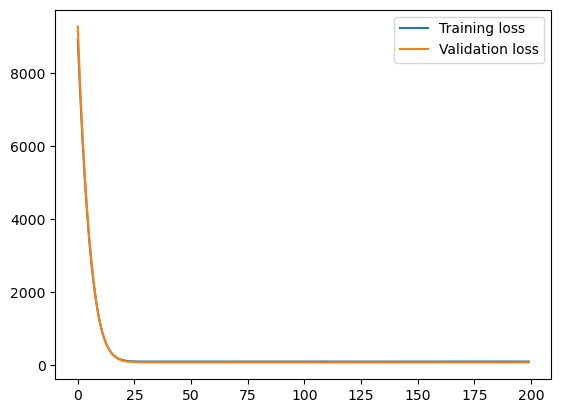

In [5]:
# model.evaluate(x_test, y_test)
loss = model.evaluate(x_test, y_test)

# 繪製訓練歷史
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

1/1 [==============================] - 0s 303ms/step


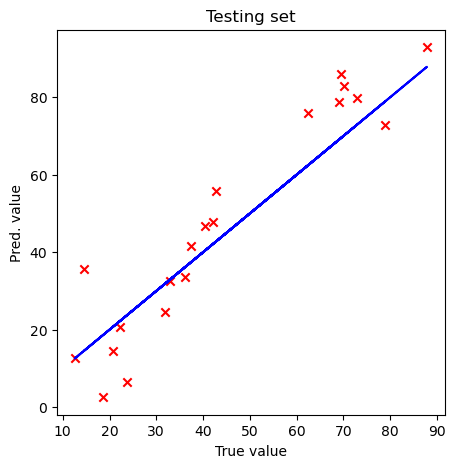

3/3 [==============================] - 0s 5ms/step


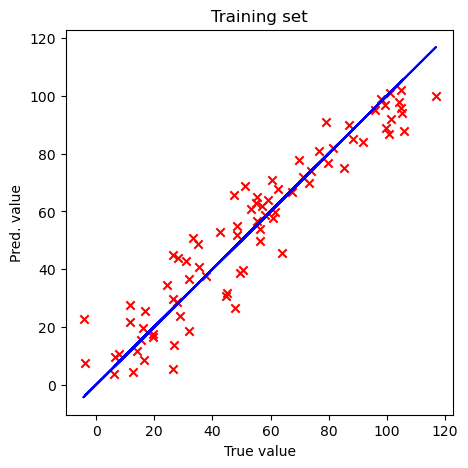

In [6]:
def plot_scatter (x, y, title, x_label, y_label,n):
    # plt.subplot(2, 2, n);
    plt.figure(figsize=(5, 5));
    plt.plot(x, x, color="blue", label="d")
    plt.scatter(x, y, marker="x", color="red")
    # plt.axis((0,210, 0,210))
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

y_pred = model.predict(x_test)
plot_scatter(y_test, y_pred, "Testing set", "True value", "Pred. value",1)

y_pred = model.predict(x_train)
plot_scatter(y_train, y_pred, "Training set", "True value", "Pred. value",2)


3/3 [==============================] - 0s 5ms/step


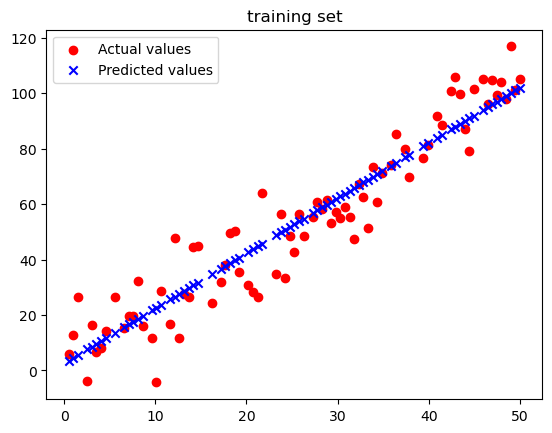

1/1 [==============================] - 0s 59ms/step


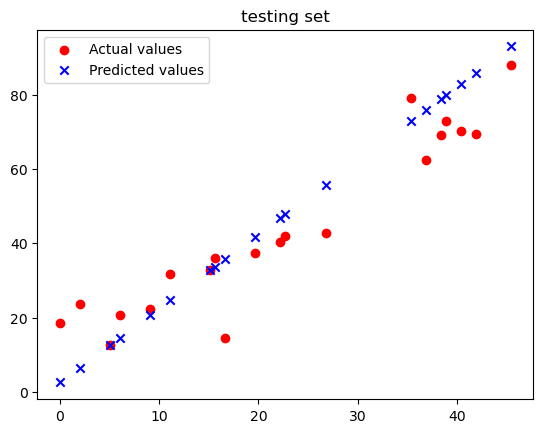

In [7]:
y_pred = model.predict(x_train)
plt.scatter(x_train, y_train, color='red', label='Actual values')
plt.scatter(x_train, y_pred, color='blue', marker='x', label='Predicted values')
plt.title('training set')
plt.legend()
plt.show()


y_pred = model.predict(x_test)
plt.scatter(x_test, y_test, color='red', label='Actual values')
plt.scatter(x_test, y_pred, color='blue', marker='x', label='Predicted values')
plt.title('testing set')
plt.legend()
plt.show()

### Exercise : Please try to write R2 and Pearson correlation function for evaluating the training model

### Coefficient of determination, denoted R2
R2值衡量的是模型解釋的"變異"量相對於總變異量的比例。R2=1意味著模型完美地擬合了數據，能夠解釋所有的變異性；而R2=0代表著模型沒有解釋任何變異量，即它未能捕捉到y和y^之間的任何關係，意味著線性模型沒有提供超越基線模型（即常數模型，這個模型預測的 y 值對於所有觀察值都是 y 的平均值）的預測能力預測能力

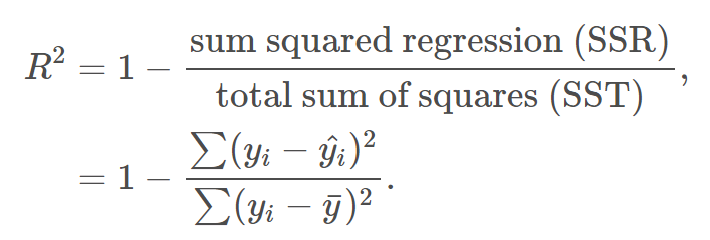

Reference :

https://en.wikipedia.org/wiki/Coefficient_of_determination

https://www.ncl.ac.uk/webtemplate/ask-assets/external/maths-resources/statistics/regression-and-correlation/coefficient-of-determination-r-squared.html

In [16]:
from sklearn.metrics import r2_score

y_pred = model.predict(x_test)
R2_test = r2_score(y_test, y_pred)

y_pred = model.predict(x_train)
R2_train = r2_score(y_train, y_pred)

print(R2_train, R2_test)

3/3 [==============================] - 0s 4ms/step
0.897767411928087 0.7942563527620095


## Pearson correlation function
#### The Pearson correlation measures the strength of the linear relationship between two variables. It has a value between -1 to 1, with a value of -1 meaning a total negative linear correlation, 0 being no correlation, and + 1 meaning a total positive correlation.

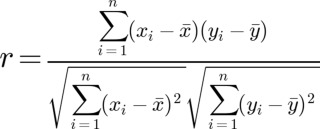

餘弦相似度的定義是兩個向量的點積除以這兩個向量模的乘積：

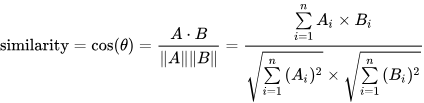
​

In [15]:
from sklearn.datasets import make_regression
from sklearn.feature_selection import r_regression


y_pred = model.predict(x_test)
Pearson_test = r_regression(y_test.reshape(-1, 1), y_pred.ravel())
y_pred = model.predict(x_train)
Pearson_train = r_regression(x_train.reshape(-1, 1), y_pred.ravel())

print(Pearson_test, Pearson_train)

3/3 [==============================] - 0s 4ms/step
[0.94535951] [0.99999992]
